# Regresión logística
---

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En este ejemplo, empezaremos por ver como crear un clasificador binario sobre el siguiente problema:

Los datos consisten en calificaciones de dos exámenes para 100 alumnos. El valor objetivo adquiere valores binarios [0,1]. 1 significa que el alumno fue admitido en la universidad, mientras que 0 significa que no fue admitido. 

El objetivo es construir un clasificador que pueda predecir si una aplicación será admitida en la universidad o no.

El conjunto de datos se encuentra en la carpeta *data* y se llama *marks.txt*.

### 1: Carga los datos en un dataframe. Cambiamos los nombres de las columnas

In [3]:
path = "data/marks.txt"
df = pd.read_csv(path, header=None)
df.columns = ["Examen 1", "Examen 2", "Admitido"]

df.head()

,Examen 1,Examen 2,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 2: Mostramos la información de forma gráfica

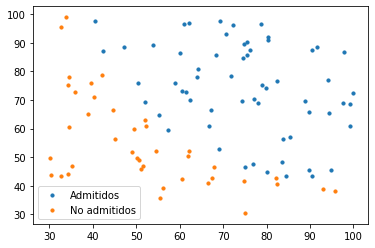

In [5]:
# Obtenemos los admitidos

admitted = df[df.Admitido == 1]

# Obtenemos los no admitidos
not_admitted = df[df.Admitido == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitidos')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='No admitidos')
plt.legend()
plt.show()

### 3: Generamos los descriptivos básicos

Algunas preguntas que estaria bien contestar
1. Es un problema desbalanceado?
1. Existen valores nulos?
1. Existen outliers?

In [6]:
df.describe()

,Examen 1,Examen 2,Admitido
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### 4: Dividimos los datos en dos partes: df_train y df_test con el 80% y el 20% de los datos repartidos de forma aleatoria.

La pregunta a contestar es **Por qué hacemos esto?**

In [30]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=33)

print("Entrenamiento: " + str(df_train.shape[0]))
print("Test: " + str(df_test.shape[0]))

X_train = df_train.drop('Admitido', axis=1)
y_train = df_train['Admitido']

Entrenamiento: 80
Test: 20


### 5: Carga la libreria de sklearn que permite entrenar una regresión logística.

Instanciamos el modelo bajo el nombre `clf_lr`

In [27]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(C=0.01,solver="liblinear") # Esta sentencia nos crea un clasificador logístico

### 6: Entrenamos el modelo y lo evaluamos

In [28]:
# Esta sentencia entrena el clasificador con nuestro conjunto de entrenamiento
clf_lr.fit(X_train, y_train)
# Como resultado vemos los diferentes parámetreos del método
# Vamos a comentar: C, random_state

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
X_test = df_test.drop('Admitido', axis=1)
y_test = df_test['Admitido']
clf_lr.score(X_test, y_test)

0.65

**Vamos a ver de manera gráfica como de bueno es nuestro modelo sobre el conjunto de test**

C:\Users\gabri\Anaconda3\envs\MADM2019\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\gabri\Anaconda3\envs\MADM2019\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


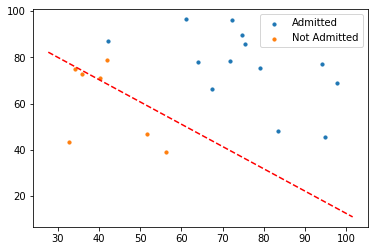

In [18]:

admitted = df_test[df.Admitido == 1]
not_admitted = df_test[df.Admitido == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

x_values = [np.min(X_test["Examen 1"] - 5), np.max(X_test["Examen 2"] + 5)]
y_values =  - (clf_lr.intercept_ + np.dot(clf_lr.coef_[0][0], x_values)) / clf_lr.coef_[0][1] 
plt.plot(x_values, y_values, "--", c="r")

plt.legend();
plt.show();

## Ejercicio:

1. Dibujar el resultado del clasificador sobre el conjunto de entrenamiento 
2. Repetir la clasificación probando diferentes valores del parámetro C

### Recursos adicionales

* [Documentación regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [A Friendly Introduction to Cross-Entropy Loss](https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/)
* [Liblinear library](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)

## Variación del parámetro C

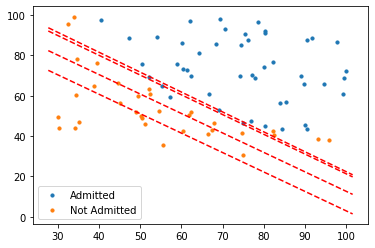

In [42]:
valores =[0.5, 1.0, 5.0, 10.0]
classificadores = []
for i in valores:
    clf_lr = LogisticRegression(C=i,solver="liblinear") # Esta sentencia nos crea un clasificador logístico
    clf_lr.fit(X_train, y_train)
    classificadores.append(clf_lr)

admitted = df_train[df_train.Admitido == 1]
not_admitted = df_train[df_train.Admitido == 0]

# plots
plt.scatter(admitted["Examen 1"], admitted["Examen 2"], s=10, label='Admitted')
plt.scatter(not_admitted["Examen 1"], not_admitted["Examen 2"], s=10, label='Not Admitted')

for clf_lr in classificadores:
    
    x_values = [np.min(X_test["Examen 1"] - 5), np.max(X_test["Examen 2"] + 5)]
    y_values =  - (clf_lr.intercept_ + np.dot(clf_lr.coef_[0][0], x_values)) / clf_lr.coef_[0][1] 
    plt.plot(x_values, y_values, "--", c="r")

plt.legend();
plt.show();
    